# [AI_18_Project3] Chest X-Ray Images

--------

# 프로젝트의 목표 : 이미지를 이용한 폐렴 검출 모델 생성

* 프로젝트의 목표는 흉부 엑스레이 이미지를 분석하여 폐렴을 검출하는 모델을 만드는 것입니다.

*  폐렴 질환은 전 세계적으로 매년 많은 사람들이 발생하고 있으며 특히 COVID-19로 인한 폐렴 환자들이 증가하면서 그 중요성이 더욱 부각되고 있습니다.

* 의료기관 K에서는 폐렴 환자들의 수가 증가함에 따라 의료진들은 이를 신속하게 진단하고 치료하기 위해 더욱 많은 시간과 노력을 투자해야 하는 문제점을 경험하고 있습니다. 이러한 상황에서 의료기관 K는 인공지능 기술을 활용하여 폐렴 환자를 빠르고 정확하게 진단할 수 있는 모델을 개발하고자 저희 회사에 의뢰 했습니다.


* 이 모델로 의료진의 진단과 치료를 보조하며 빠르고 정확한 검출이 가능하게 하여 폐렴 환자를 더욱 빠르고 정확하게 진단하고 치료할 수 있게 되어 환자들의 치료와 회복 기간을 단축시킬 수 있고 의료진의 시간과 비용을 절약하게 될 것입니다.

-----------------


# 1. 데이터셋 선정

Chest X-Ray Images (Pneumonia) 폐렴 진단 데이터 선정


https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia

Chest X-Ray Images (Pneumonia) 데이터는 두 가지 클래스(정상, 폐렴)로 이루어져 있으며, 총 5856개의 이미지가 포함되어 있습니다. 이 데이터셋은 의료 분야에서의 질병 진단을 자동화하는 딥러닝 모델을 개발하는데 활용될 수 있습니다.

이 데이터를 선정한 이유는 딥러닝을 이용한 의료 이미지 분류 문제는 현재 매우 핫한 분야 중 하나입니다. 이 데이터셋을 이용하여 딥러닝 모델을 개발하면 폐렴 진단을 보다 정확하게 돕는 의료 AI를 만들 수 있고 이를 의료 분야에서 AI를 적용하는 기업의 의료 이미지 분석을 통해 질병 진단, 치료 계획 수립, 예방 및 관리 등 다양한 분야에서 AI 기술을 활용할 수 있습니다.

# 2. 프로젝트 가설 수립

* 문제 정의 : Chest X-Ray Images (Pneumonia) 데이터 셋에서 폐렴여부를 예측하는 이진 분류 문제입니다. 즉, disease라는 폐렴 여부를 예측하는 분류모델을 만들어야 합니다.

* Target 데이터는 폐암여부를 나타낸 disease 칼럼을 타겟으로 설정하였습니다.

* "딥러닝으로 폐렴 환자의 X-ray 이미지에서 폐렴의 여부를 구분할 수 있다"는 가설을 세웠습니다.

# 데이터 준비작업 및 전처리

### (1) 라이브러리, 데이터 로딩

In [ ]:
import pandas as pd
import numpy as np
import random
import os
import matplotlib.pyplot as plt
import matplotlib as mat
import seaborn as sns
import matplotlib.cbook

import warnings
warnings.simplefilter(action='ignore')
%matplotlib inline

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing import image
#이미지 로드 및 이미지 증식
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras import callbacks, layers
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Flatten, Conv2D, MaxPooling2D, Input, Rescaling

from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report,confusion_matrix, roc_auc_score, roc_curve, accuracy_score, recall_score, precision_score, f1_score
# 케라스 콜백함수
from keras.callbacks import ReduceLROnPlateau

import glob
#이미지 출력을 위해 두 점사이 어느 지점의 값이 얼마인지 추정하는 보간법
import cv2

In [ ]:
np.random.seed(42)
tf.random.set_seed(42)
IMG_SIZE = 224
BATCH = 32
SEED = 42

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


* 구글 드라이브에서 데이터 가져오기

In [ ]:
main_path = "/content/drive/MyDrive/Sprint/Section3_Project3/chest_xray"

train_path = os.path.join(main_path,"train")
test_path=os.path.join(main_path,"test")

train_normal = glob.glob(train_path+"/NORMAL/*.jpeg")
train_pneumonia = glob.glob(train_path+"/PNEUMONIA/*.jpeg")

test_normal = glob.glob(test_path+"/NORMAL/*.jpeg")
test_pneumonia = glob.glob(test_path+"/PNEUMONIA/*.jpeg")

* Target 레이블로 폐렴의 유무인 disease 칼럼 생성

In [ ]:
train_list = [x for x in train_normal]
train_list.extend([x for x in train_pneumonia])

df_train = pd.DataFrame(np.concatenate([['Normal']*len(train_normal) , ['Pneumonia']*len(train_pneumonia)]), columns = ['disease'])
df_train['image'] = [x for x in train_list]

test_list = [x for x in test_normal]
test_list.extend([x for x in test_pneumonia])

df_test = pd.DataFrame(np.concatenate([['Normal']*len(test_normal) , ['Pneumonia']*len(test_pneumonia)]), columns = ['disease'])
df_test['image'] = [x for x in test_list]

In [ ]:
df_train

,disease,image
0,Normal,/content/drive/MyDrive/Sprint/Section3_Project...
1,Normal,/content/drive/MyDrive/Sprint/Section3_Project...
2,Normal,/content/drive/MyDrive/Sprint/Section3_Project...
3,Normal,/content/drive/MyDrive/Sprint/Section3_Project...
4,Normal,/content/drive/MyDrive/Sprint/Section3_Project...
...,...,...
5211,Pneumonia,/content/drive/MyDrive/Sprint/Section3_Project...
5212,Pneumonia,/content/drive/MyDrive/Sprint/Section3_Project...
5213,Pneumonia,/content/drive/MyDrive/Sprint/Section3_Project...
5214,Pneumonia,/content/drive/MyDrive/Sprint/Section3_Project...


In [ ]:
df_test

,disease,image
0,Normal,/content/drive/MyDrive/Sprint/Section3_Project...
1,Normal,/content/drive/MyDrive/Sprint/Section3_Project...
2,Normal,/content/drive/MyDrive/Sprint/Section3_Project...
3,Normal,/content/drive/MyDrive/Sprint/Section3_Project...
4,Normal,/content/drive/MyDrive/Sprint/Section3_Project...
...,...,...
619,Pneumonia,/content/drive/MyDrive/Sprint/Section3_Project...
620,Pneumonia,/content/drive/MyDrive/Sprint/Section3_Project...
621,Pneumonia,/content/drive/MyDrive/Sprint/Section3_Project...
622,Pneumonia,/content/drive/MyDrive/Sprint/Section3_Project...


### Train 데이터 비율 그래프

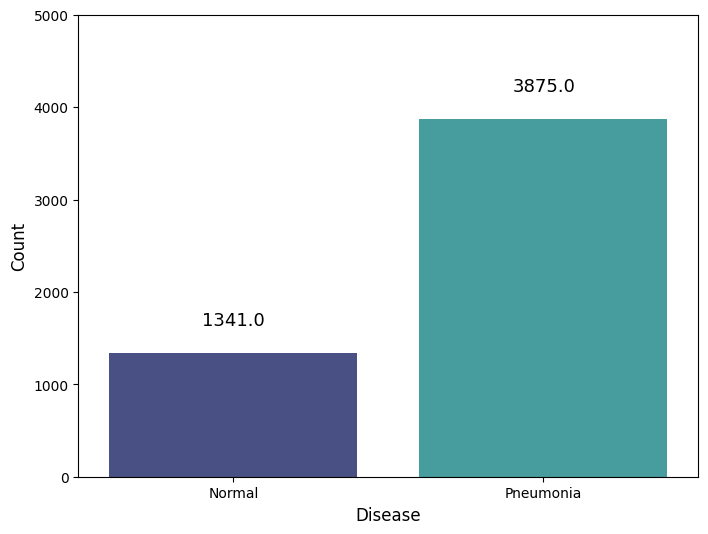

In [ ]:
plt.figure(figsize=(8,6))

ax = sns.countplot(x='disease', data=df_train, palette="mako")

plt.xlabel("Disease", fontsize= 12)
plt.ylabel("Count", fontsize= 12)
plt.ylim(0,5000)
plt.xticks([0,1], ['Normal', 'Pneumonia'], fontsize = 10)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.30, p.get_height()+300), fontsize = 13)
    
plt.show()

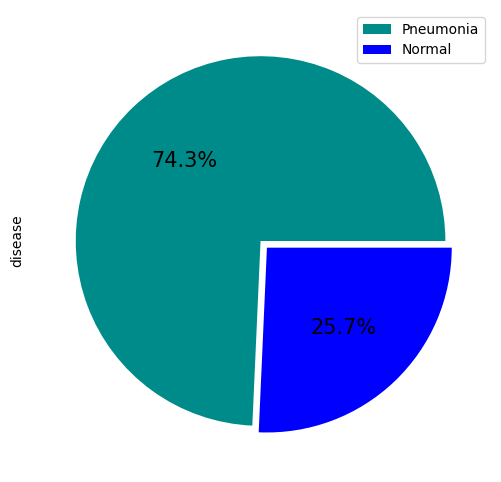

In [ ]:
plt.figure(figsize=(8,6))

df_train['disease'].value_counts().plot(kind='pie',labels = ['',''], autopct='%1.1f%%', colors = ['darkcyan','blue'], explode = [0,0.05], textprops = {"fontsize":15})

plt.legend(labels=['Pneumonia', 'Normal'])
plt.show()

* Train 데이터 폐렴과 정상 이미지 출력

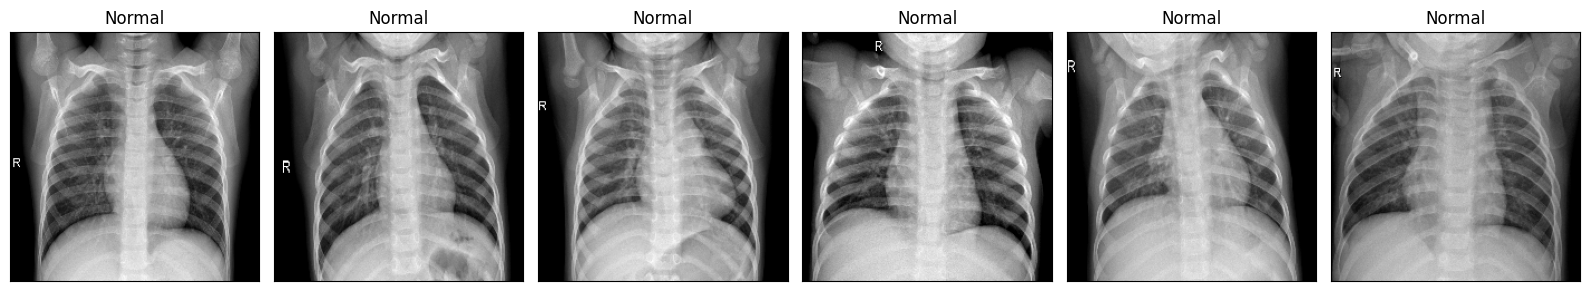

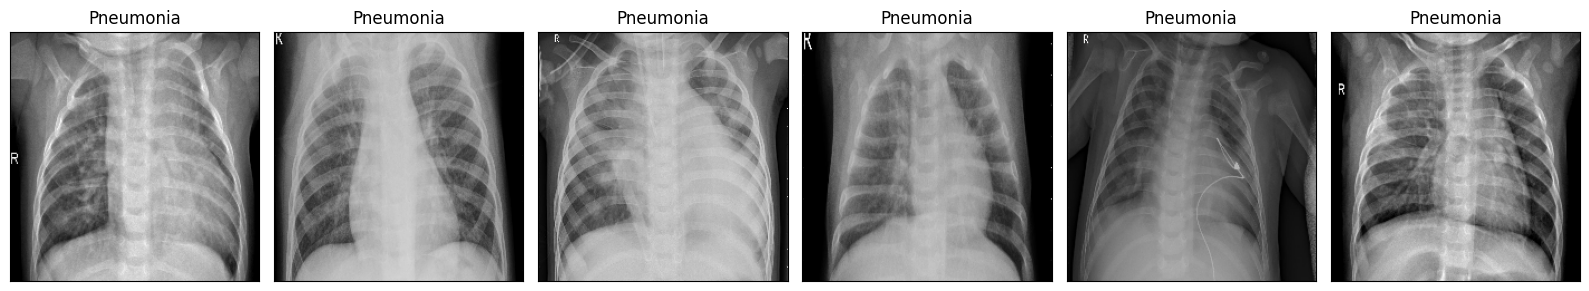

In [ ]:
fig, axes = plt.subplots(nrows = 1, ncols = 6, figsize = (16,10), subplot_kw = {'xticks':[], 'yticks':[]})

for i, ax in enumerate(axes.flat):
    img = cv2.imread(train_normal[i])
    img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
    ax.imshow(img)
    ax.set_title("Normal")
fig.tight_layout()
plt.show()

fig, axes = plt.subplots(nrows = 1, ncols = 6, figsize = (16,10), subplot_kw = {'xticks':[], 'yticks':[]})

for i, ax in enumerate(axes.flat):
    img = cv2.imread(train_pneumonia[i])
    img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
    ax.imshow(img)
    ax.set_title("Pneumonia")
fig.tight_layout()
plt.show()

* Train 데이터의 이미지에서 뼈모양을 추출하여 정상과 폐렴 비교

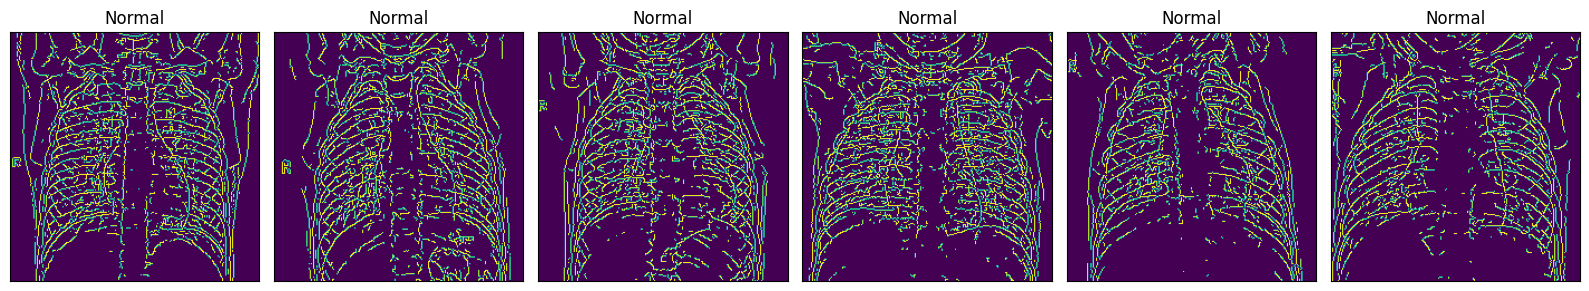

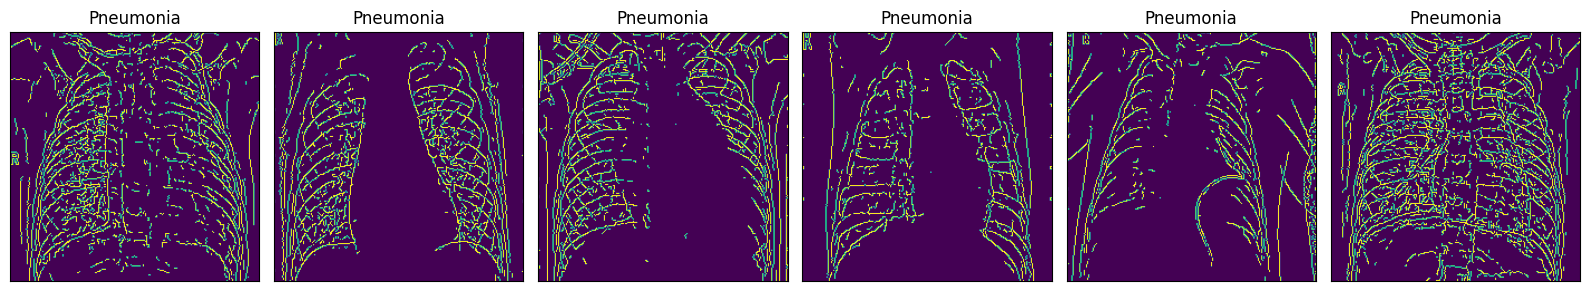

In [ ]:
fig, axes = plt.subplots(nrows = 1, ncols = 6, figsize = (16,10), subplot_kw = {'xticks':[], 'yticks':[]})

for i, ax in enumerate(axes.flat):
    img = cv2.imread(train_normal[i])
    img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.Canny(img, 80, 100)
    ax.imshow(img)
    ax.set_title("Normal")
fig.tight_layout()
plt.show()

fig, axes = plt.subplots(nrows = 1, ncols = 6, figsize = (16,10), subplot_kw = {'xticks':[], 'yticks':[]})

for i, ax in enumerate(axes.flat):
    img = cv2.imread(train_pneumonia[i])
    img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.Canny(img, 80, 100)
    ax.imshow(img)
    ax.set_title("Pneumonia")
fig.tight_layout()
plt.show()

* 정상에 비해 폐렴의 이미지에서는 뼈의 모양이 잘 보이지 않는 것을 알 수 있다.

### 기존의 val 데이터 양이 적어서 train_test_split을 이용하여 검증 데이터 생성

In [ ]:
train_df, val_df = train_test_split(df_train, test_size = 0.20, 
                                    random_state = SEED, 
                                    stratify = df_train['disease'])

### (2) 이미지 데이터 벡터화

In [ ]:
train_datagen = ImageDataGenerator(rescale=1/255.)

val_datagen = ImageDataGenerator(rescale=1/255.)

ds_train = train_datagen.flow_from_dataframe(train_df,
                                             x_col = 'image',
                                             y_col = 'disease',
                                             target_size = (IMG_SIZE, IMG_SIZE),
                                             batch_size = BATCH,
                                             class_mode = 'binary',
                                             seed = SEED)

ds_val = val_datagen.flow_from_dataframe(val_df,
                                            x_col = 'image',
                                            y_col = 'disease',
                                            target_size = (IMG_SIZE, IMG_SIZE),
                                            batch_size = BATCH,
                                            class_mode = 'binary',
                                            seed = SEED)

ds_test = val_datagen.flow_from_dataframe(df_test,
                                            x_col = 'image',
                                            y_col = 'disease',
                                            target_size = (IMG_SIZE, IMG_SIZE),
                                            class_mode = 'binary',
                                            batch_size = 1,
                                            shuffle = False)

Found 4172 validated image filenames belonging to 2 classes.
Found 1044 validated image filenames belonging to 2 classes.
Found 624 validated image filenames belonging to 2 classes.


# 모델 생성

In [ ]:
# 콜백 함수 설정

early_stopping = callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    min_delta=1e-7,
    restore_best_weights=True,
)

plateau = callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor = 0.2,                                     
    patience = 2,                                   
    min_delt = 1e-7,                                
    cooldown = 0,                               
    verbose = 1
) 

* 사전훈련 모델 ResNet152V2를 이용하여 파이프라인 구성

* CNN으로 직접 층을 쌓는 경우 모델을 세밀하게 조정할 수 있어서 좀 더 세밀한 모델링이 가능합니다. 하지만 모델을 학습하는 데에 시간이 많이 사용되고 학습데이터의 이미지 수가 3800여장으로 데이터가 적어 과적합 문제가 발생할 수 있습니다. 

* 그래서 사전학습 모델 ResNet152V2를 이용하여 층을 추가하고 미세 조정을 하여 성능을 높이고 시간을 단축 하였습니다.

* ResNet152V2는 매우 깊은 모델로 다른 많은 사전 학습 모델과 비교했을 때 이미지 분류에 높은 성능을 보여 사용하였습니다.

In [ ]:
base_model = tf.keras.applications.ResNet152V2(
    weights='imagenet',
    input_shape=(IMG_SIZE, IMG_SIZE, 3),
    include_top=False)

base_model.trainable = False

# 모델 파이프라인 
def pretrained_model_pipeline():
    
    # Input, 이미지 사이즈 224 사용
    inputs = layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
    x = base_model(inputs)
    # Pooling 적용
    x = layers.GlobalAveragePooling2D()(x)
    # 뉴런 128개에 ReLU 활성화 함수 적용
    x = layers.Dense(128, activation='relu')(x)
    # Dropout 0.1 적용
    x = layers.Dropout(0.1)(x)
    
    # Output층 이진분류 이므로 sigmoid사용
    output = layers.Dense(1, activation='sigmoid')(x)
    
    model = keras.Model(inputs=[inputs], outputs=output)
    
    return model

234545216/234545216 [==============================] - 2s 0us/step


* Model compile

이진 분류 문제이므로 손실함수 binary_crossentropy 사용​

최적화 알고리즘은 Adam을 사용하고 학습률을 (5e-5)설정​

평가지표로 binary_accuracy 사용

In [ ]:
keras.backend.clear_session()

model = pretrained_model_pipeline()
model.compile(loss='binary_crossentropy', 
              optimizer = keras.optimizers.Adam(learning_rate=5e-5), 
              metrics='binary_accuracy')

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 resnet152v2 (Functional)    (None, 7, 7, 2048)        58331648  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 128)               262272    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                             

* 모델 학습

batch_size는 한 번에 처리할 데이터의 개수로 32로 지정​

과적합을 방지하고 학습 시간을 줄이기 위해 검증 데이터셋의 손실 값이 더 이상 감소하지 않으면 학습을 조기 종료시키는 역할을 하는 early_stopping과 손실 값이 더 이상 감소하지 않으면 학습률을 감소시키는 역할을 하는 plateau 콜백 함수를 사용하였습니다.

In [ ]:
history = model.fit(ds_train,
          batch_size = BATCH, epochs = 50,
          validation_data=ds_val,
          callbacks=[early_stopping, plateau],
          steps_per_epoch=(len(train_df)/BATCH),
          validation_steps=(len(val_df)/BATCH));

Epoch 1/50
130/130 [==============================] - 94s 643ms/step - loss: 0.3139 - binary_accuracy: 0.8713 - val_loss: 0.1891 - val_binary_accuracy: 0.9368 - lr: 5.0000e-05
Epoch 2/50
130/130 [==============================] - 77s 593ms/step - loss: 0.1593 - binary_accuracy: 0.9434 - val_loss: 0.1466 - val_binary_accuracy: 0.9454 - lr: 5.0000e-05
Epoch 3/50
130/130 [==============================] - 77s 588ms/step - loss: 0.1291 - binary_accuracy: 0.9537 - val_loss: 0.1248 - val_binary_accuracy: 0.9540 - lr: 5.0000e-05
Epoch 4/50
130/130 [==============================] - 77s 589ms/step - loss: 0.1103 - binary_accuracy: 0.9638 - val_loss: 0.1131 - val_binary_accuracy: 0.9550 - lr: 5.0000e-05
Epoch 5/50
130/130 [==============================] - 76s 586ms/step - loss: 0.1018 - binary_accuracy: 0.9650 - val_loss: 0.1048 - val_binary_accuracy: 0.9617 - lr: 5.0000e-05
Epoch 6/50
130/130 [==============================] - 77s 589ms/step - loss: 0.0921 - binary_accuracy: 0.9684 - val_loss

* Epoch당 오차 그래프

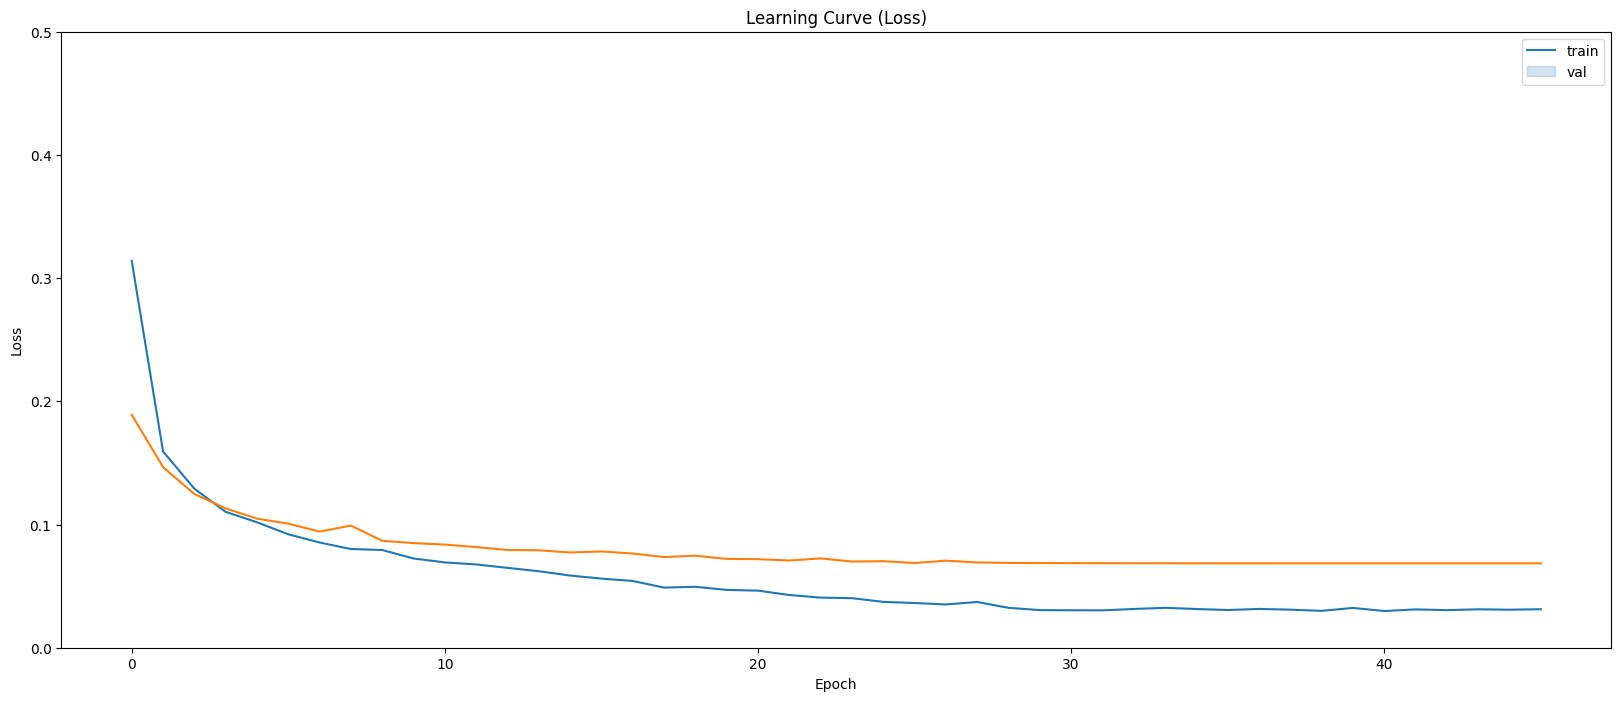

In [ ]:
fig, ax = plt.subplots(figsize=(20,8))
sns.lineplot(x = history.epoch, y = history.history['loss'])
sns.lineplot(x = history.epoch, y = history.history['val_loss'])
ax.set_title('Learning Curve (Loss)')
ax.set_ylabel('Loss')
ax.set_xlabel('Epoch')
ax.set_ylim(0, 0.5)
ax.legend(['train', 'val'], loc='best')
plt.show()

* Epoch당 정확도 그래프

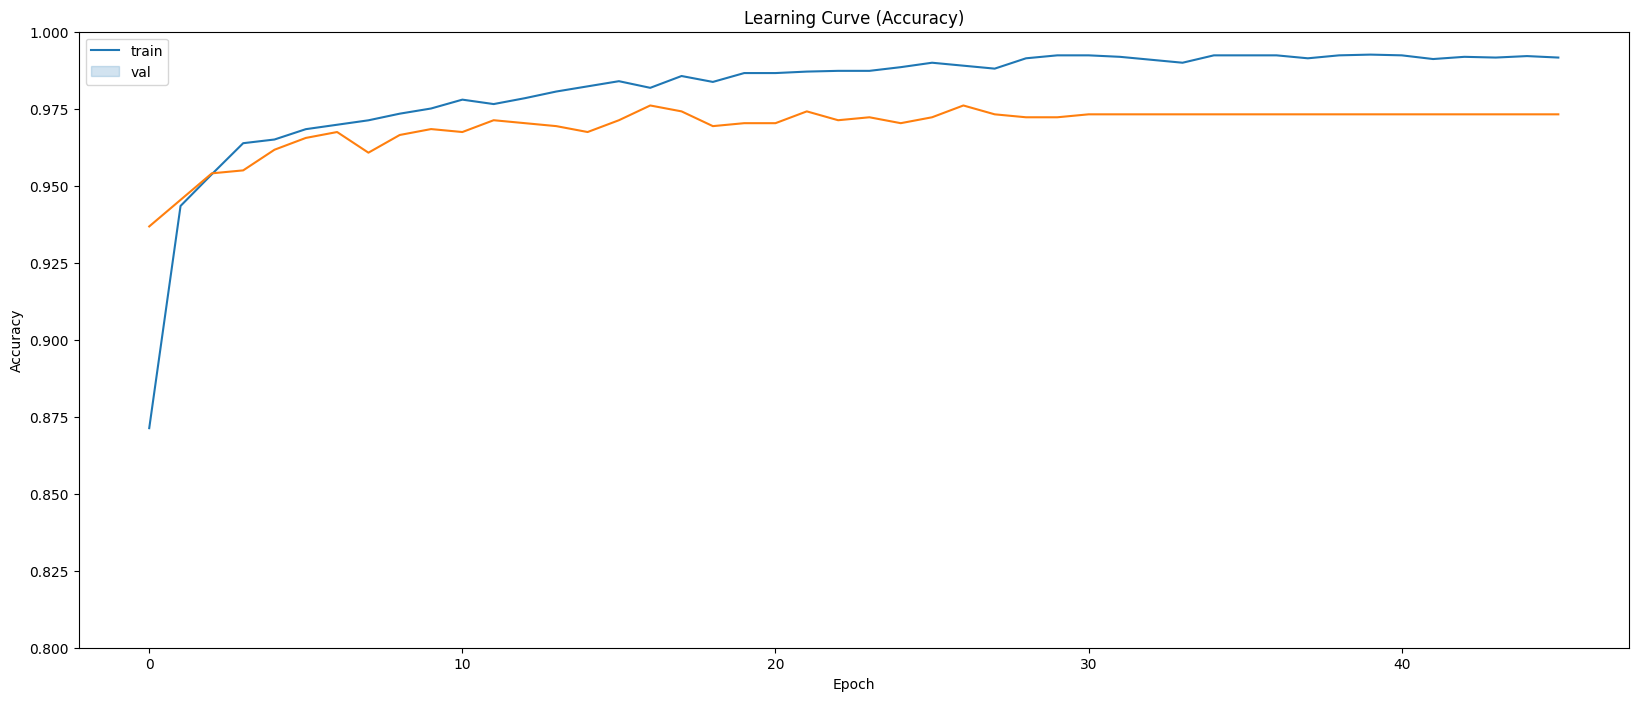

In [ ]:
fig, ax = plt.subplots(figsize=(20,8))
sns.lineplot(x = history.epoch, y = history.history['binary_accuracy'])
sns.lineplot(x = history.epoch, y = history.history['val_binary_accuracy'])
ax.set_title('Learning Curve (Accuracy)')
ax.set_ylabel('Accuracy')
ax.set_xlabel('Epoch')
ax.set_ylim(0.80, 1.0)
ax.legend(['train', 'val'], loc='best')
plt.show()

# 예측결과 출력

* 검증 데이터 예측

In [ ]:
score = model.evaluate(ds_val, steps = len(val_df)/BATCH, verbose = 0)
print('Val loss:', score[0])
print('Val accuracy:', score[1])

Val loss: 0.06851178407669067
Val accuracy: 0.9731800556182861


* 테스트 데이터 예측

In [ ]:
score = model.evaluate(ds_test, steps = len(df_test), verbose = 0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.6709997057914734
Test accuracy: 0.8189102411270142


In [ ]:
num_label = {'Normal': 0, 'Pneumonia' : 1}
Y_test = df_test['disease'].copy().map(num_label).astype('int')

In [ ]:
ds_test.reset()
predictions = model.predict(ds_test, steps=len(ds_test), verbose=0)
pred_labels= np.where(predictions>0.5, 1, 0)

* 테스트 데이터 혼동 행렬

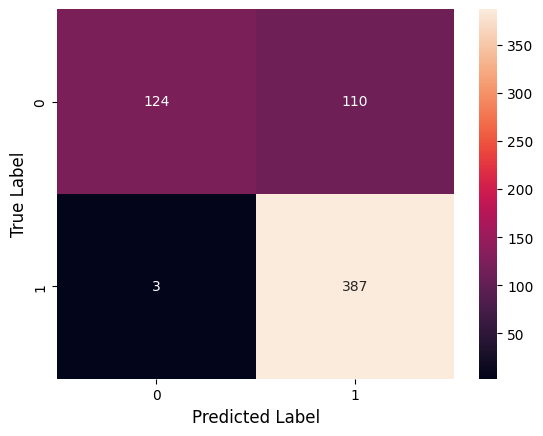

In [ ]:
cm = confusion_matrix(Y_test, pred_labels)
sns.heatmap(cm, annot=True, fmt="d")

plt.xlabel("Predicted Label", fontsize= 12)
plt.ylabel("True Label", fontsize= 12)

plt.show()

FP 부분이 높게 나와 아쉬웠습니다.

* 폐렴 분류 모델 예측결과 출력

In [ ]:
print(classification_report(Y_test, pred_labels))

accuracy_deep = accuracy_score(Y_test, pred_labels)
precision_deep = precision_score(Y_test, pred_labels)
recall_deep = recall_score(Y_test, pred_labels)
f1_deep = f1_score(Y_test, pred_labels)

print(f'accuracy(정확도) is {accuracy_deep}')
print(f'precision(정밀도) is {precision_deep}')
print(f'recall(재현율) is {recall_deep}')
print(f'f1점수(F1 score)is {f1_deep}')

              precision    recall  f1-score   support

           0       0.98      0.53      0.69       234
           1       0.78      0.99      0.87       390

    accuracy                           0.82       624
   macro avg       0.88      0.76      0.78       624
weighted avg       0.85      0.82      0.80       624

accuracy(정확도) is 0.8189102564102564
precision(정밀도) is 0.778672032193159
recall(재현율) is 0.9923076923076923
f1점수(F1 score)is 0.8726042841037204


 실제로 폐렴인데 폐렴이 아니라고 판단하는 1종 오류가 나오면 환자가 위험하기 때문에 경우를 최소화 하기 위해서는 정밀도 높아야 합니다.

 정확도와 정밀도을 중점으로 봤을 때 Test 데이터에 대해

 정확도 : 0.8189, 정밀도 : 0.7786이 나오는 것을 알 수 있습니다.


또한 폐렴 진단에 있어서 양성과 음성 판단이 모두 중요하기 때문에 ROC-AUC도 중요한 평가지표로 놓고 살펴본다.

ROC_AUC:  0.9441211921981154


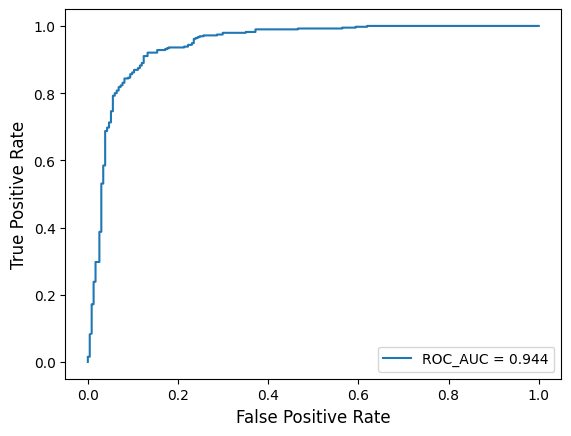

In [ ]:
roc_auc = roc_auc_score(Y_test, predictions)
print('ROC_AUC: ', roc_auc)

fpr, tpr, thresholds = roc_curve(Y_test, predictions)

plt.plot(fpr, tpr, label = 'ROC_AUC = %0.3f' % roc_auc)

plt.xlabel("False Positive Rate", fontsize= 12)
plt.ylabel("True Positive Rate", fontsize= 12)
plt.legend(loc="lower right")

plt.show()

In [ ]:
val2_path = os.path.join(main_path,"val")
val2_normal = glob.glob(val2_path+"/NORMAL/*.jpeg")
val2_pneumonia = glob.glob(val2_path+"/PNEUMONIA/*.jpeg")

val2_list = [x for x in val2_normal]
val2_list.extend([x for x in val2_pneumonia])

df_val2 = pd.DataFrame(np.concatenate([['Normal']*len(val2_normal) , ['Pneumonia']*len(val2_pneumonia)]), columns = ['disease'])
df_val2['image'] = [x for x in val2_list]

val2_datagen = ImageDataGenerator(rescale=1/255.)

ds_val2 = val2_datagen.flow_from_dataframe(df_val2,
                                            x_col = 'image',
                                            y_col = 'disease',
                                            target_size = (IMG_SIZE, IMG_SIZE),
                                            class_mode = 'binary',
                                            batch_size = 1,
                                            shuffle = False)

Found 16 validated image filenames belonging to 2 classes.


In [ ]:
num_label = {'Normal': 0, 'Pneumonia' : 1}
Y_val2 = df_val2['disease'].copy().map(num_label).astype('int')

In [ ]:
ds_val2.reset()
predictions_val2 = model.predict(ds_val2, steps=len(ds_val2), verbose=0)
pred_labels_val2= np.where(predictions_val2>0.5, 1, 0)

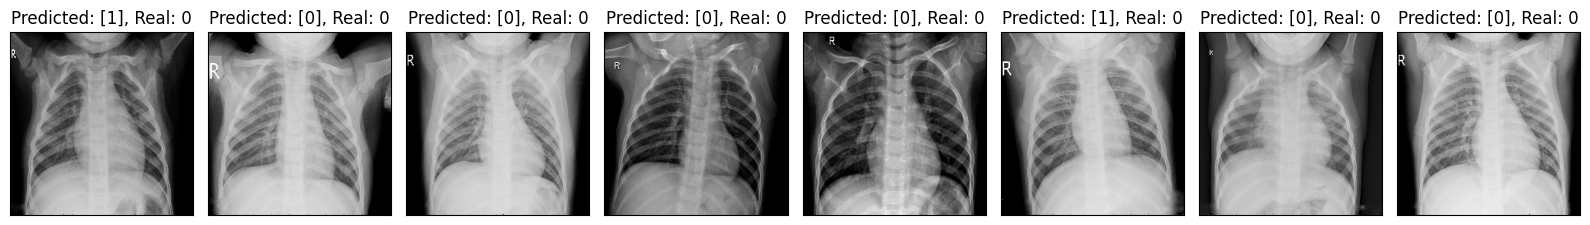

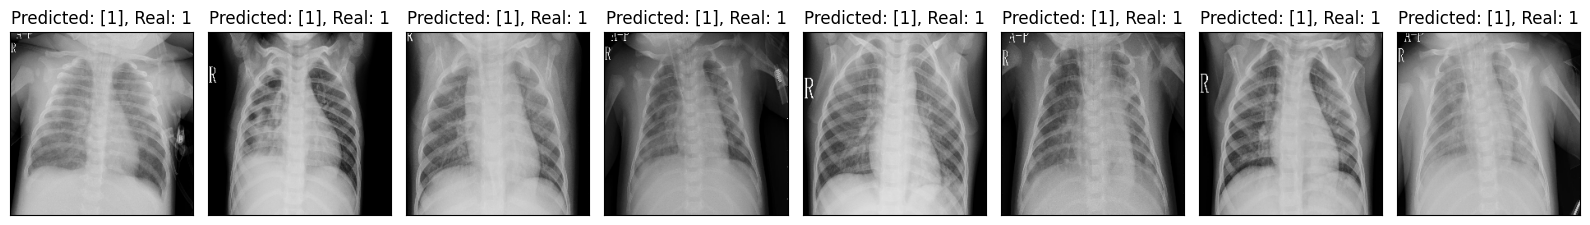

In [ ]:
fig, axes = plt.subplots(nrows = 1, ncols = 8, figsize = (16,10), subplot_kw = {'xticks':[], 'yticks':[]})

for i, ax in enumerate(axes.flat):
    img = cv2.imread(val2_normal[i])
    img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
    ax.imshow(img)
    ax.set_title('Predicted: {}, Real: {}'.format(pred_labels_val2[i], Y_val2[i]))
fig.tight_layout()
plt.show()

fig, axes = plt.subplots(nrows = 1, ncols = 8, figsize = (16,10), subplot_kw = {'xticks':[], 'yticks':[]})

for i, ax in enumerate(axes.flat):
    img = cv2.imread(val2_pneumonia[i])
    img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
    ax.imshow(img)
    ax.set_title('Predicted: {}, Real: {}'.format(pred_labels_val2[i+8], Y_val2[i+8]))
fig.tight_layout()
plt.show()

모델을 사용하여 폐렴 예측 이미지 출력

엑스레이 이미지와 예측 결과와 실제 결과를 출력해본 결과 모델이 잘 예측하기 때문에 딥러닝으로
폐렴 환자의 X-ray 이미지에서 폐렴의 여부를 구분할 수 있다는 가설이 맞는 것을 알수 있다.

* 모델 저장하기

In [ ]:
from keras.models import load_model

model.save('Pneumonia_model.h5')

* 모델 불러오기

In [ ]:
# 2. 모델 불러오기
from keras.models import load_model
model = load_model('Pneumonia_model.h5')

# 페렴 부분을 표시해보기

1/1 [==============================] - 1s 514ms/step


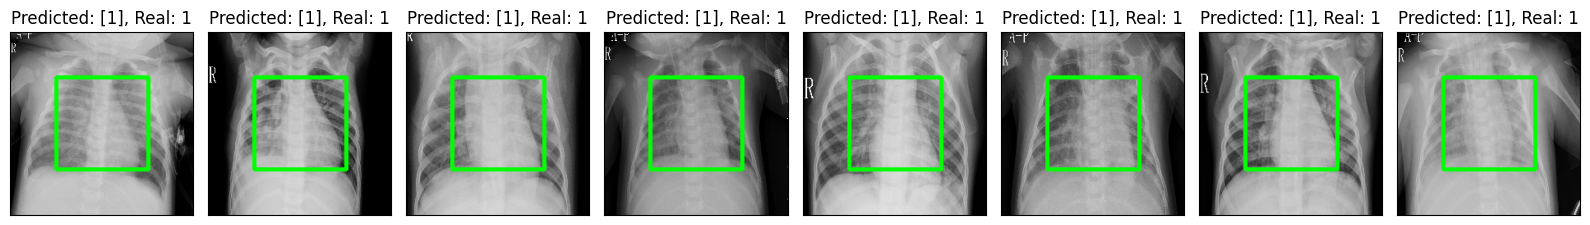

In [ ]:
import cv2
fig, axes = plt.subplots(nrows = 1, ncols = 8, figsize = (16,10), subplot_kw = {'xticks':[], 'yticks':[]})

for i, ax in enumerate(axes.flat):
    # 이미지 불러오기
    img = cv2.imread(val2_pneumonia[i], cv2.IMREAD_COLOR)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))

    # 이미지 예측
    pred_test2 = model.predict(np.expand_dims(img, axis=0))[0]

    # 폐렴 부분을 감지한 경우
    if pred_test2 > 0.5:
      # 이미지에 사각형 그리기
      height, width, _ = img.shape
      x1, y1, x2, y2 = int(width*0.25), int(height*0.25), int(width*0.75), int(height*0.75) # 사각형 위치 및 크기
      image_with_box = img.copy()
      img2 = cv2.rectangle(image_with_box, (x1, y1), (x2, y2), (0, 255, 0), 3) # 사각형 그리기
      ax.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))  # 이미지 출력
    # 폐렴 부분을 감지하지 못한 경우
    else:
      print("폐렴이 감지되지 않았습니다.")
    ax.set_title('Predicted: {}, Real: {}'.format(pred_labels_val2[i+8], Y_val2[i+8]))
fig.tight_layout()
plt.show()

폐렴일 경우 부위를 사각형으로 표시하는 것 까지는 해봤지만 모델이 정상 폐렴으로 sigmoid활성화 함수로 판단하기전 이미지 배열에서 각 원소마다의 폐렴 확률을 보고 좌표를 구하는 것은 실패해서 아쉬웠다.